In [1]:
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
 
from adjustText import adjust_text

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

In [2]:
def visualize_latent_factors(V, ids, titles, method_name, plot_title):
    
    points = V[ids, :]
    
    fig, ax = plt.subplots(figsize=(4, 4))
    
    ax.scatter(points[:, 0], points[:, 1], s=100, alpha=0.7)
    
    texts = []
    for i, (x, y) in enumerate(points):
        short_title = titles[ids[i]][:20] + '...' if len(titles[ids[i]]) > 20 else titles[ids[i]]
        texts.append(ax.text(x, y, short_title, weight=500, size=10, ha='center', va='center'))

    
    plt.title(plot_title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    
    adjust_text(texts, arrowprops={'arrowstyle': '-', 'color': 'black'})
    
    filename = f"../figs/{method_name}_{plot_title.replace(' ', '_').lower()}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
movies_df = pd.read_csv('../data/movies.csv', encoding='latin-1')
movies_df = movies_df.reset_index()

movie_titles = {int(row['Movie ID']) - 1: row['Movie Title'] for _, row in movies_df.iterrows()}


any10 = list(range(10))

popularity = train_df.groupby('Movie ID').size()
most_popular = (popularity.sort_values(ascending=False).head(10).index - 1).tolist()

avg_ratings = train_df.groupby('Movie ID')['Rating'].mean()
best_movies = (avg_ratings.sort_values(ascending=False).head(10).index - 1).tolist()

genres = ["Drama", "Comedy", "Documentary"]
genre_movies = {}
for genre in genres:
    subset = movies_df[movies_df[genre] == 1]
    indices = (subset['Movie ID'] - 1).head(10).tolist()
    genre_movies[genre] = indices

In [4]:
print(any10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
from sklearn.preprocessing import StandardScaler

# V = np.load("scratch_bias.npy")
V = np.load("../data/naive_bias.npy")
sc = StandardScaler(with_std=False)
svd = TruncatedSVD(n_components=2, n_iter=20)
V = sc.fit_transform(V)
V = svd.fit_transform(V)

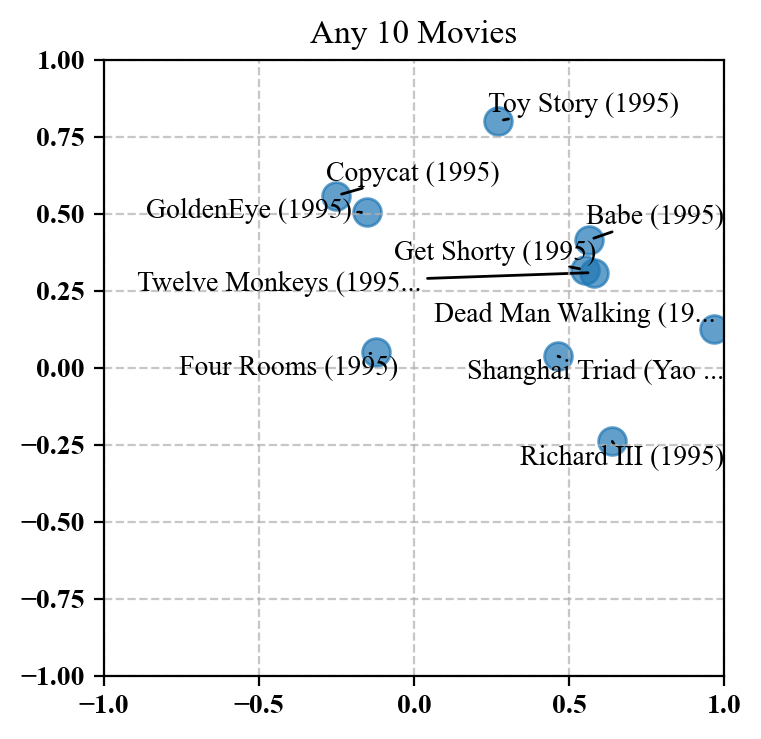

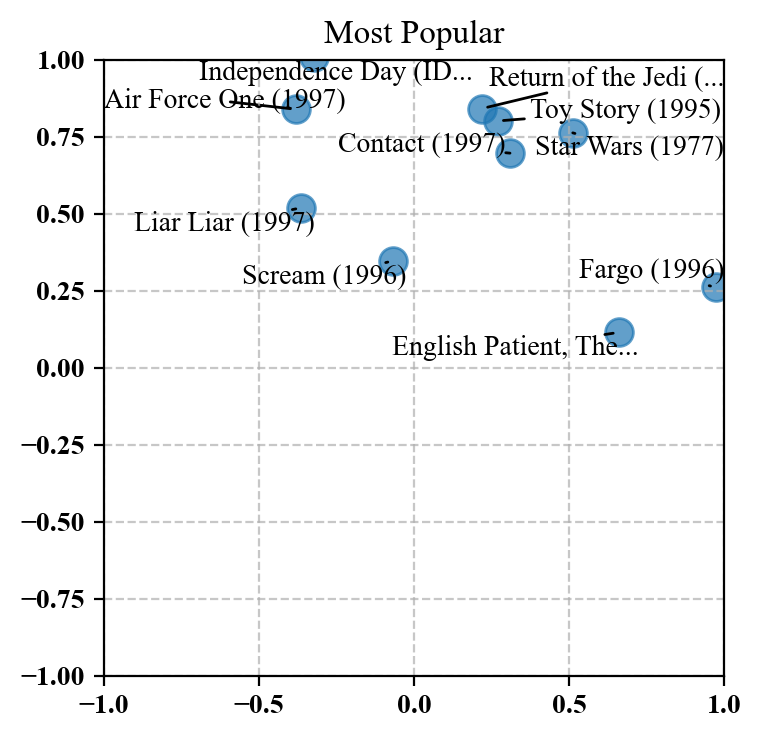

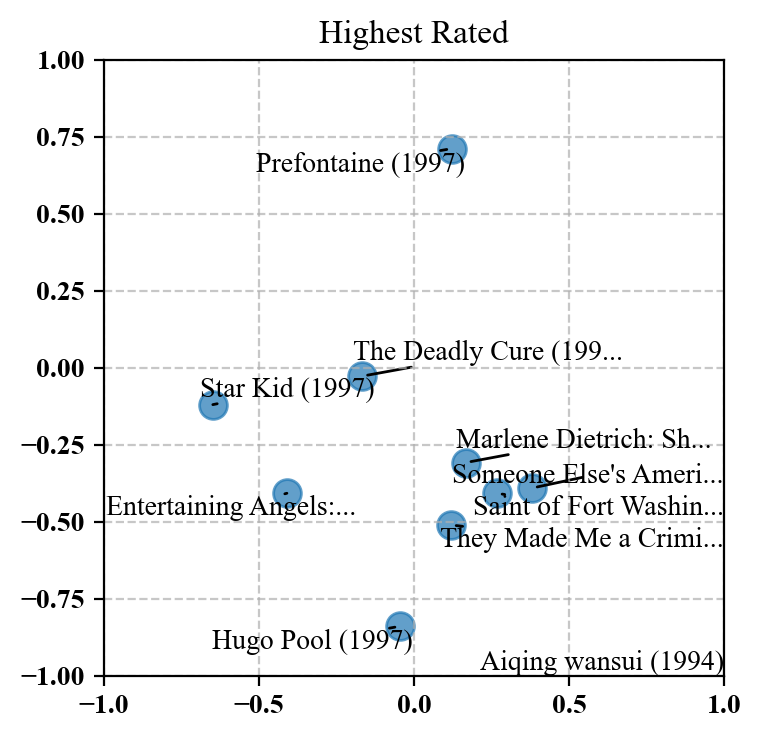

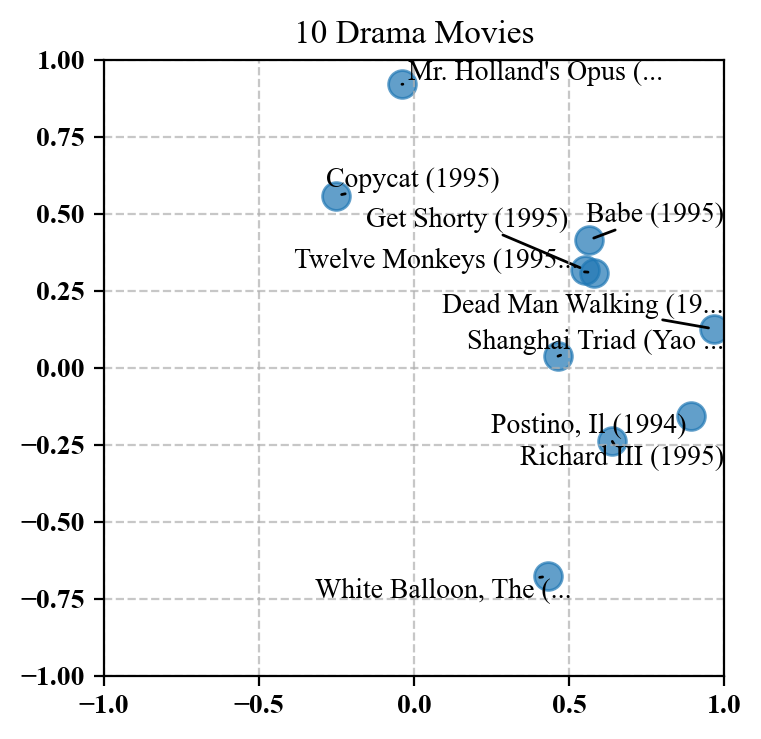

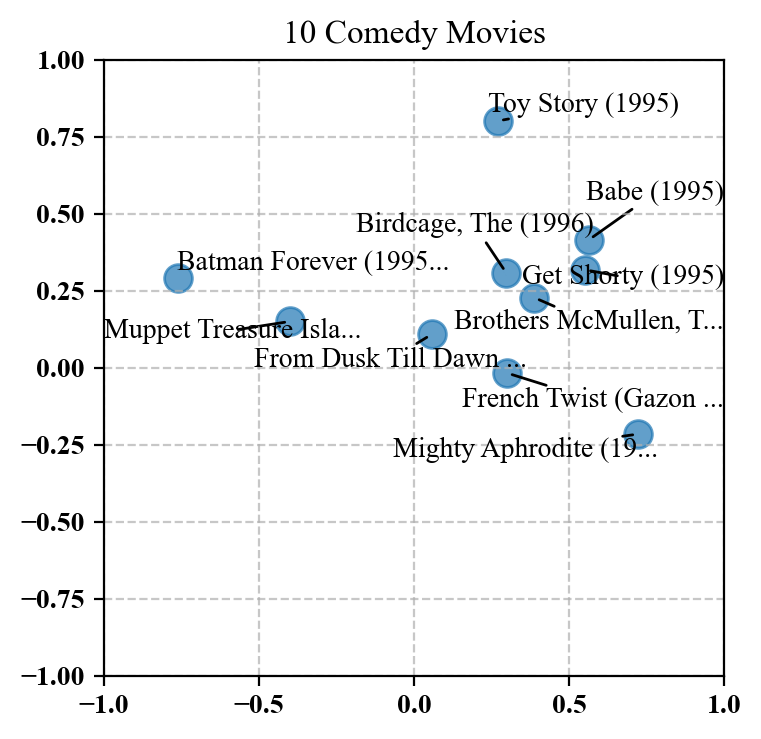

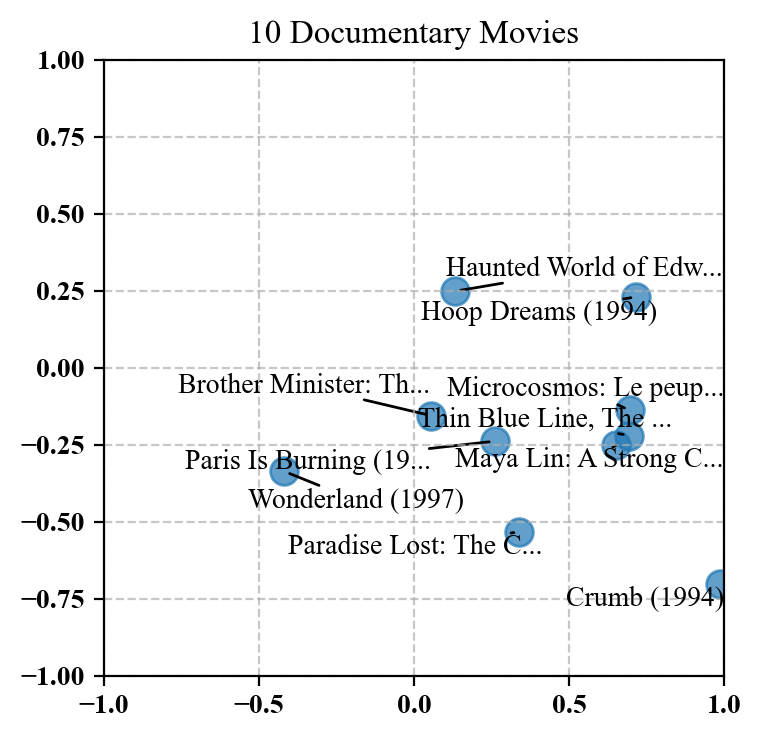

In [ ]:
charts_params = {
    'Any 10 Movies': any10,
    'Most Popular': most_popular,
    'Highest Rated': best_movies,
}

# for title, ids in charts_params.items():
#     visualize_latent_factors(V, ids, movie_titles, "naive_bias", title)

for genre in genres:
    visualize_latent_factors(V, genre_movies[genre], movie_titles, "naive_bias", f"10 {genre} Movies")